## Global

In [4]:
# Import das bibliotecas base:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [5]:
#Import dos arquivos csv
pilotos = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/pilotos.csv')
piloto_classificacoes = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/piloto_classificacoes.csv')
corridas = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/corridas.csv')
sprint_resultados = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/sprint_resultados.csv')
circuitos = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/circuitos.csv') 
tempo_por_volta = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/tempo_por_volta.csv') 
parada_boxes = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/parada_boxes.csv')
qualificacao = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/qualificacao.csv') 
resultados = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/resultados.csv')
construtores = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/construtores.csv')
construtor_classificacoes = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/construtor_classificacoes.csv')
construtor_resultados = pd.read_csv('./Tratamento_Limpeza_Dataset/bases_br/construtor_resultados.csv')

## Análise exploratória

Análise de conjuntos de dados de modo a resumir suas características principais, Grafos e Estatísticas referentes a cada tabela

#### AE Pilotos

In [64]:
# Merge das duas tabelas de acordo com o piloto_id (Piloto e Piloto_Classificações)
merged_df = pd.merge(piloto_classificacoes, pilotos, on='piloto_id')

# Agrupando por pilotos e somando o total de pontos
total_pontos = merged_df.groupby(['piloto_id', 'nome', 'sobrenome'])['pontos'].sum()

# Busca de pilotos com mais pontos
top_pilotos = total_pontos.nlargest(n=5)  # N = Numero de amostras de pilotos
# Mostrando os resultados
print("Pilotos com mais pontos:")
for piloto in top_pilotos.index:
    nome_piloto = ' '.join(piloto[1:])
    pontos = top_pilotos[piloto]
    print(f"{nome_piloto}: {pontos} pontos")

Pilotos com mais pontos:
Lewis Hamilton: 46550.5 pontos
Sebastian Vettel: 32026.0 pontos
Max Verstappen: 22486.5 pontos
Fernando Alonso: 21692.0 pontos
Valtteri Bottas: 19458.0 pontos


##### Pilotos com mais numeros de vitórias

Text(0.5, 0, 'Numero de vitórias')

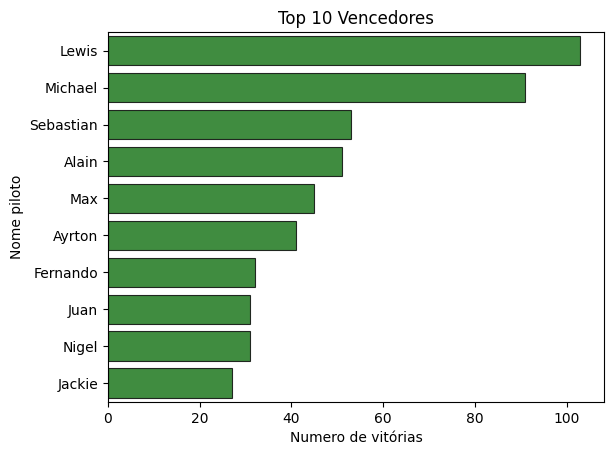

In [113]:
merged_df = pd.merge(resultados, pilotos, on='piloto_id')
piloto_vencedor = merged_df.loc[merged_df['posicao_ordem']==1].groupby('nome')['posicao_ordem'].count().sort_values(ascending=False).to_frame().reset_index()
top10Drivers = piloto_vencedor.head(10)
sns.barplot(data=top10Drivers,y='nome',x='posicao_ordem',color='green',alpha=0.8,linewidth=.8,edgecolor='black')
plt.title('Top 10 Vencedores')
plt.ylabel('Nome piloto')
plt.xlabel('Numero de vitórias')

##### Qual piloto com mais corridas

In [7]:
merged_df = pd.merge(resultados, pilotos, on='piloto_id')


volta_rapidas = merged_df[merged_df['volta_rapida'] != '\\N']

volta_rapidas_contagem = volta_rapidas.groupby(['piloto_id', 'nome', 'sobrenome'])['volta_rapida'].count()


maiores_voltas_rapidas = volta_rapidas_contagem.idxmax()
nome_piloto = ' '.join(maiores_voltas_rapidas[1:])
volta_rapidas = volta_rapidas_contagem.max()


print("Piloto com voltas(corridas):", nome_piloto)
print("Numero de voltas rapidas:", volta_rapidas)

Piloto com voltas(corridas): Fernando Alonso
Numero de voltas rapidas: 324


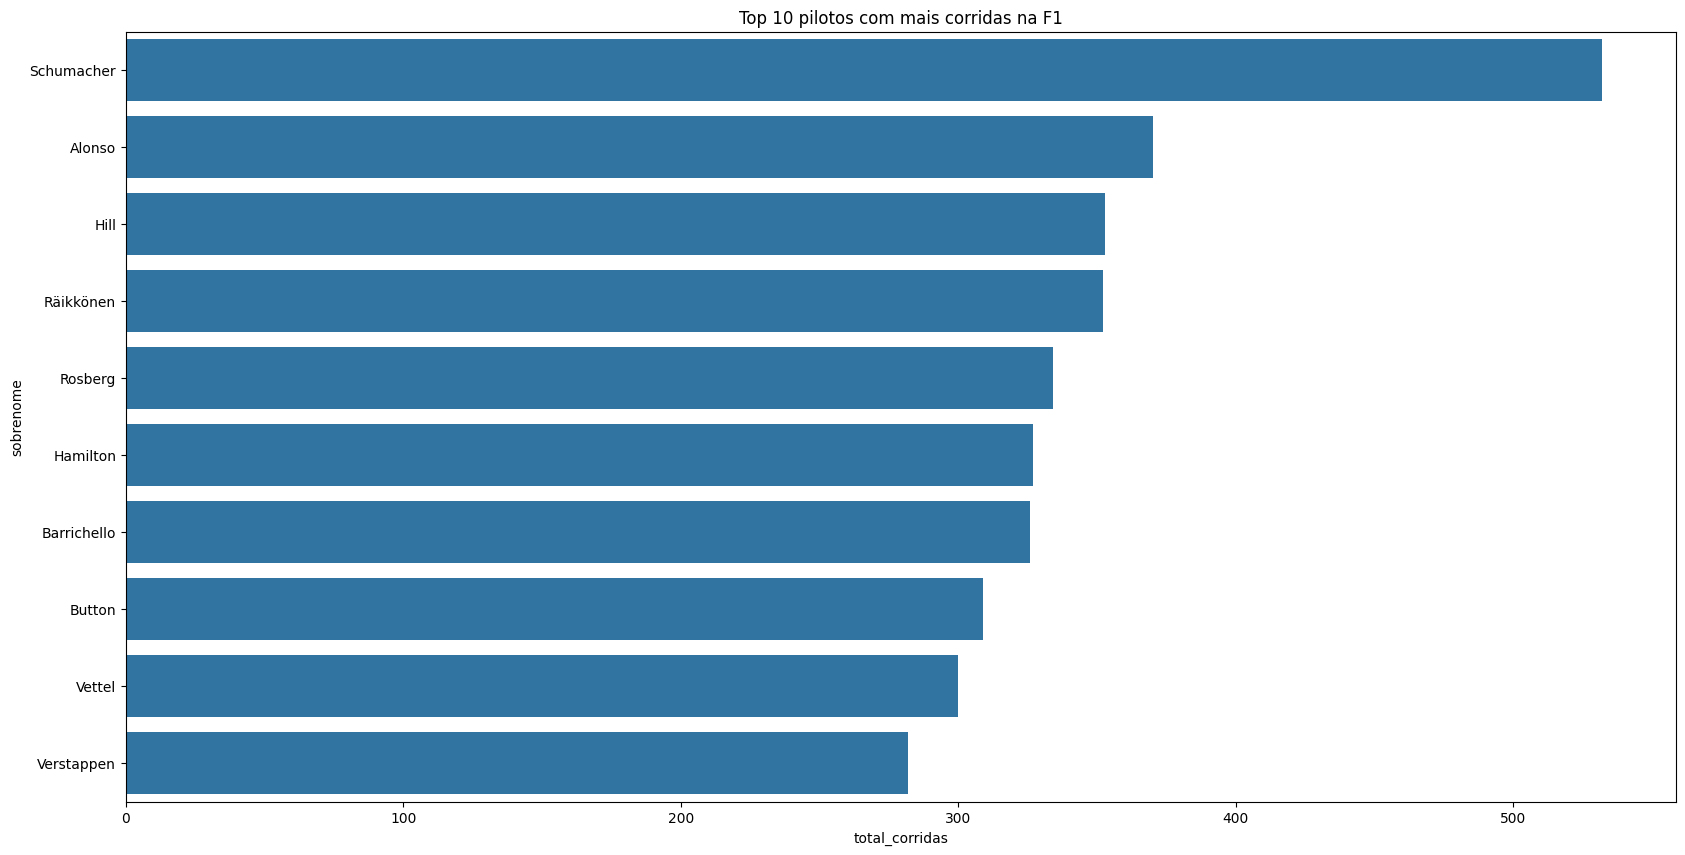

In [130]:
#En çok yarışan 10 F1 Pilotu
merged_df = pd.merge(resultados, pilotos, on='piloto_id')
mais_corridas = merged_df.groupby('sobrenome')[['corridas_id']].count().reset_index()
mais_corridas = mais_corridas.sort_values('corridas_id', ascending= False).head(10)
mais_corridas = mais_corridas.rename(columns ={'corridas_id': 'total_corridas'})
plt.figure(figsize = (20,10))
plt.title('Top 10 pilotos com mais corridas na F1')
sns.barplot(x = 'total_corridas' , y = 'sobrenome' , data = mais_corridas );

##### TOP Nacionalidades

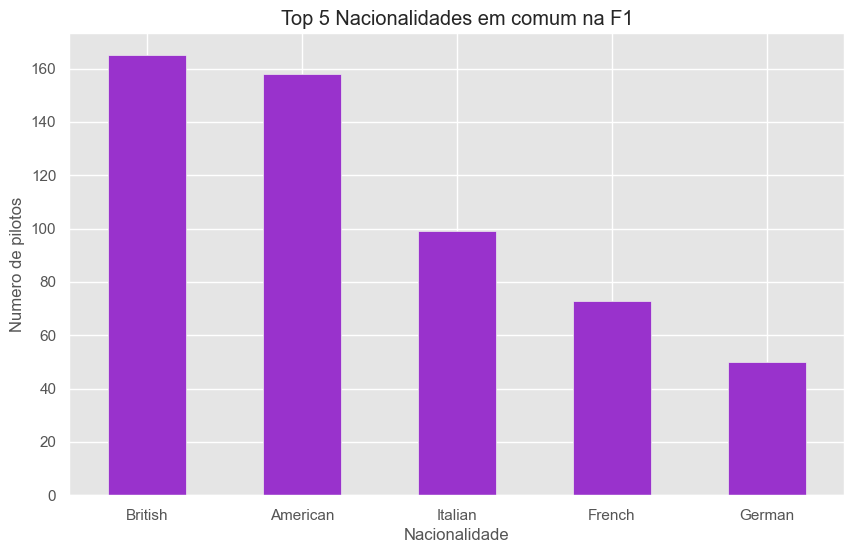

In [33]:
nacionalidade_cont = pilotos['nacionalidade'].value_counts()
top_nacionalidade = nacionalidade_cont.head(5)

plt.figure(figsize=(10, 6))
plt.style.use("ggplot")
top_nacionalidade.plot(kind='bar', color='darkorchid')
plt.xlabel('Nacionalidade')
plt.ylabel('Numero de pilotos')
plt.title('Top 5 Nacionalidades em comum na F1')
plt.xticks(rotation=0)
plt.show()

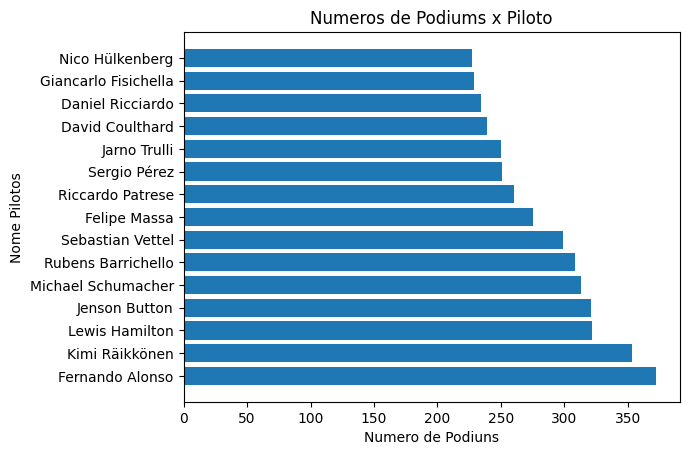

Top 10 Pilotos : 
Fernando Alonso have 372 podiums
Kimi Räikkönen have 353 podiums
Lewis Hamilton have 322 podiums
Jenson Button have 321 podiums
Michael Schumacher have 313 podiums
Rubens Barrichello have 308 podiums
Sebastian Vettel have 299 podiums
Felipe Massa have 275 podiums
Riccardo Patrese have 260 podiums
Sergio Pérez have 251 podiums


In [104]:


pilotoIdEPodiums = {}
def pegarnomePilotoPorId(piloto_id):
    filtered_df = pilotos[(pilotos['piloto_id'] == piloto_id)][['nome','sobrenome']]
    nomecompleto = filtered_df['nome'] + " " + filtered_df['sobrenome']
    return nomecompleto.values[0]


for index, row in piloto_classificacoes.iterrows():
    try:
        pilotoIdEPodiums[row['piloto_id']] +=1
    except:
        pilotoIdEPodiums[row['piloto_id']] =1
        
pilotoIdEPodiums = dict(sorted(pilotoIdEPodiums.items(), key=lambda item: item[1], reverse=True))


nomes_ = [pegarnomePilotoPorId(piloto_id) for piloto_id in pilotoIdEPodiums.keys()]
podiums_ = list(pilotoIdEPodiums.values())

top_n_pilotos = 15
nomes_top = nomes_[:top_n_pilotos]
podiums_top = podiums_[:top_n_pilotos]

# Create a horizontal bar chart
plt.barh(nomes_top, podiums_top)

# Add labels and title
plt.xlabel('Numero de Podiuns')
plt.ylabel('Nome Pilotos')
plt.title('Numeros de Podiums x Piloto')

# Show the plot
plt.show()

print(f"Top 10 Pilotos : ")
for i in range(10):
    print(f"{nomes_[i]} have {podiums_[i]} podiums")




#### AE Constutores

##### Construtores com mais corridas

In [77]:
melhores_times=construtores.merge(construtor_resultados,on = 'construtor_id',how = 'left')
melhores_times = melhores_times[['nome','pontos','corrida_id']]
melhores_times = melhores_times.groupby('nome')['corrida_id'].nunique().sort_values(ascending = False).reset_index(name = 'corridas')
melhores_times = melhores_times[melhores_times['corridas'] >= 100]
melhores_times

,nome,corridas
0,Ferrari,1012
1,McLaren,895
2,Williams,809
3,Tyrrell,433
4,Renault,403
5,Sauber,395
6,Team Lotus,395
7,Red Bull,360
8,Minardi,345
9,Ligier,330


C:\Users\jpa\AppData\Local\Temp\ipykernel_11072\3463600052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corridas', y='nome', data=melhores_times, palette='Spectral')


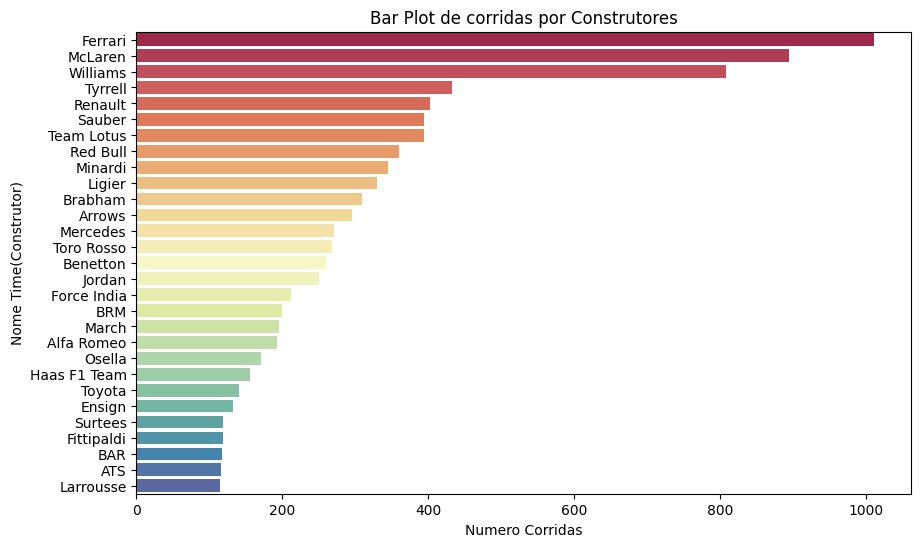

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(x='corridas', y='nome', data=melhores_times, palette='Spectral')
plt.xlabel('Numero Corridas')  
plt.ylabel('Nome Time(Construtor)')  
plt.title('Bar Plot de corridas por Construtores')  
plt.show()

##### Construtores com mais pontos

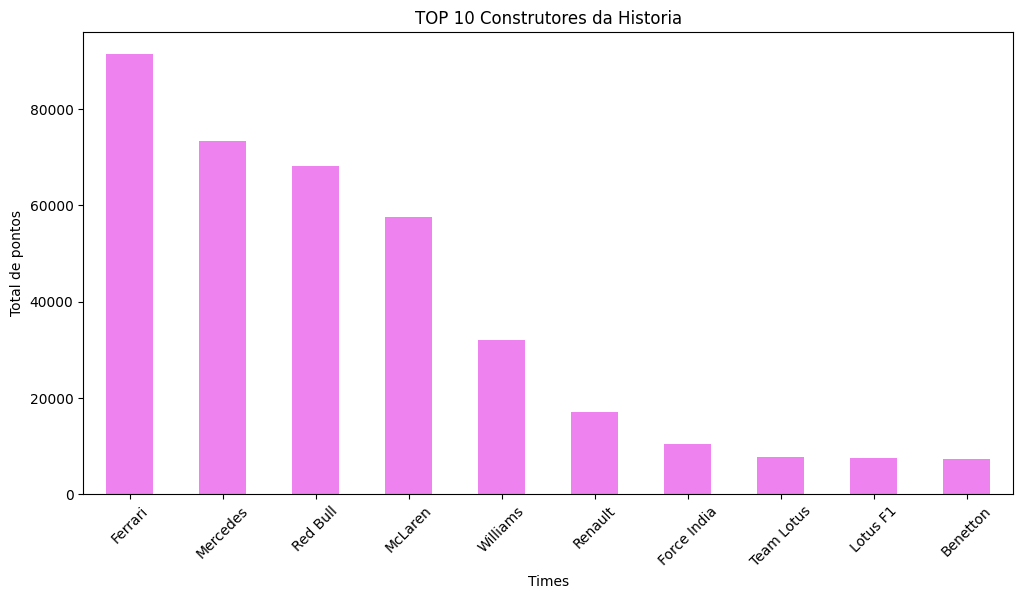

In [77]:
melhores_construtores = pd.merge(construtor_classificacoes, construtores, on='construtor_id')
melhores_construtores = melhores_construtores.groupby('nome')['pontos'].sum()
melhores_construtores = melhores_construtores.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
melhores_construtores.plot(kind='bar', color='violet')
plt.xlabel('Times')
plt.ylabel('Total de pontos')
plt.title('TOP 10 Construtores da Historia')
plt.xticks(rotation=45)
plt.show()

#### AE Circuitos

##### Quais paises possuem mais circuitos

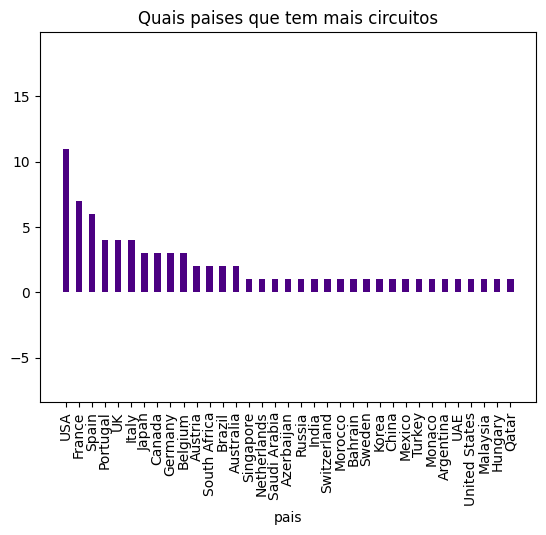

In [10]:
#Distribuição de classificações
count_ratings = circuitos['pais'].value_counts()

# Visualização em um gráfico de pizza
count_ratings.plot(kind='bar', color='indigo')
plt.axis('equal')
plt.title('Quais paises que tem mais circuitos')
plt.show()

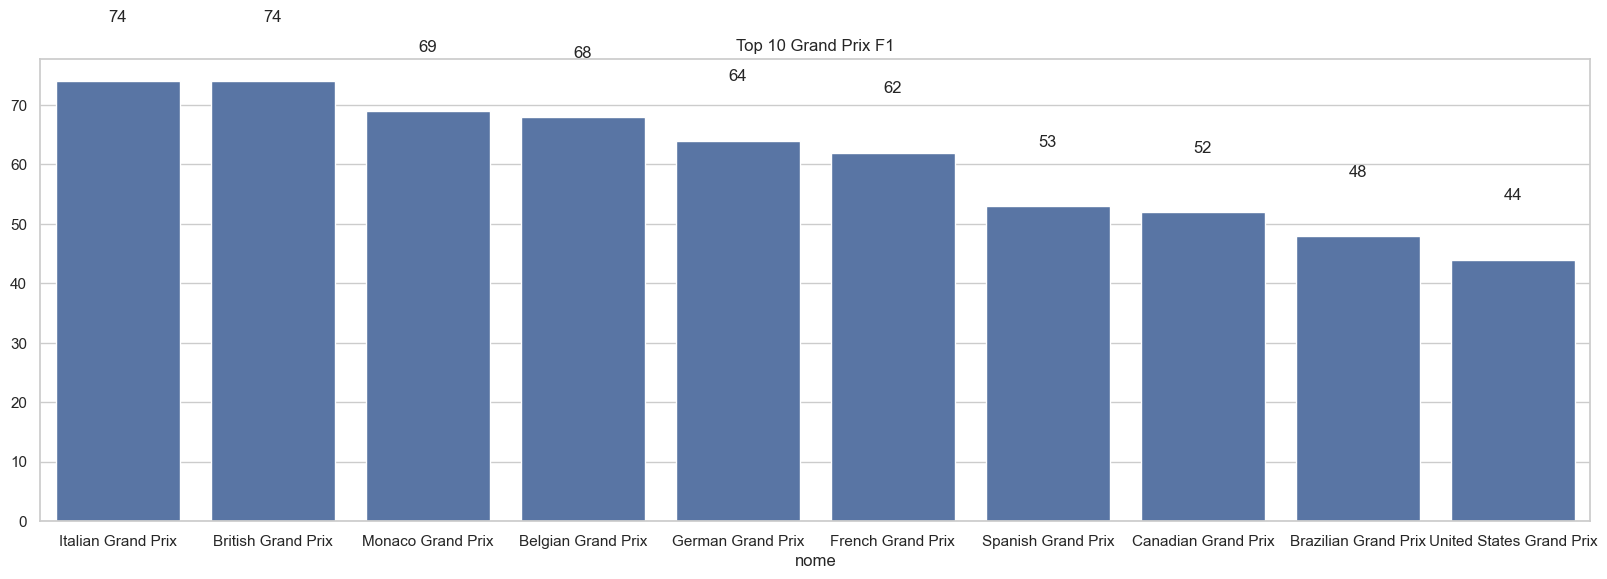

In [28]:
top_corridas=corridas['nome'].value_counts()[:10]
sns.set_style("whitegrid")
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=top_corridas.index, y=top_corridas.values)
ax.set_title("Top 10 Circuitos Grand Prix F1")


for i, v in enumerate(top_corridas):
    ax.text(i, v + 10, str(v), ha='center', fontsize=12)


plt.show()

#### AE Corridas

##### Quais circuitos possuem mais corridas

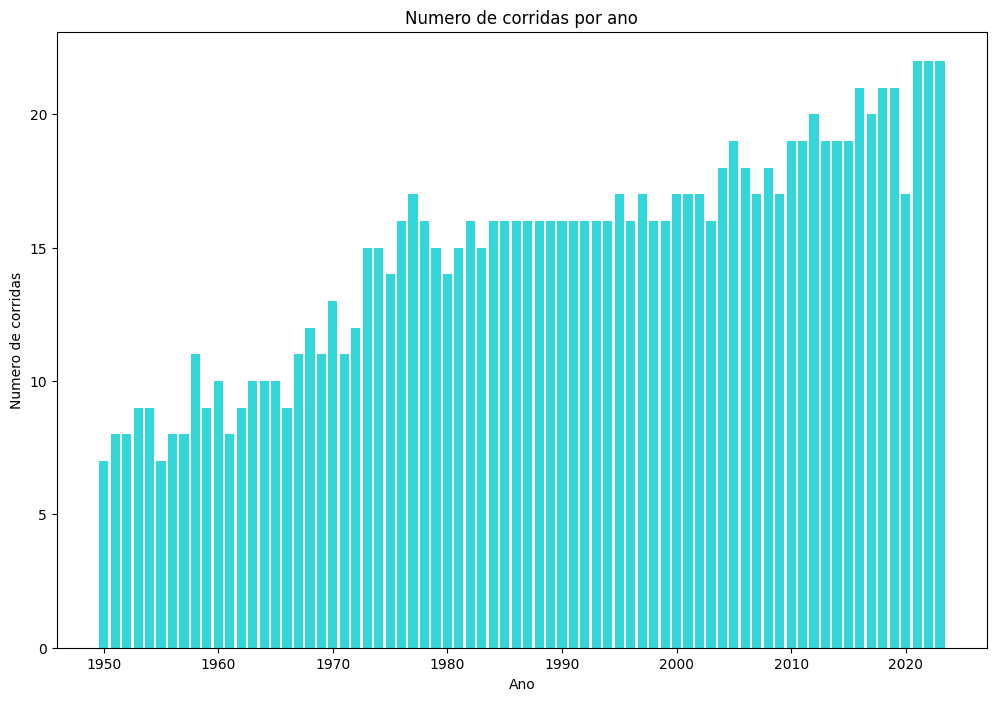

In [15]:
corridas_porano = corridas.groupby('ano')['corrida_id'].nunique()
plt.figure(figsize=(12, 8))
colors = plt.cm.hsv(range(len(corridas_porano)))
plt.bar(corridas_porano.index, corridas_porano.values, color='darkturquoise', alpha=0.8)

plt.title('Numero de corridas por ano')
plt.xlabel('Ano')
plt.ylabel('Numero de corridas')

plt.show()

#### AE Tempo_Por_Volta (laptimes)

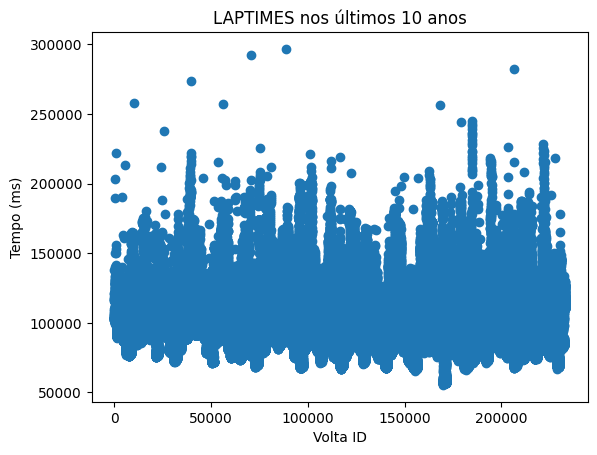

In [6]:
ano = 2023

anos_filtrados = corridas[corridas.ano >= ano - 10]

#Filter down to last ten years of data
voltas_filtradas = tempo_por_volta[tempo_por_volta.corrida_id.isin(anos_filtrados.corrida_id)]
# Filter out extreme outliers
voltas_filtradas = voltas_filtradas[voltas_filtradas.milisegundos <= 300000]

plot_index = [x for x in range(len(voltas_filtradas.milisegundos))]


fig, ax = plt.subplots()

ax.set_xlabel('Volta ID')
ax.set_ylabel('Tempo (ms)')
ax.set_title('LAPTIMES nos últimos 10 anos')



plt.scatter(x=plot_index, y=voltas_filtradas.milisegundos)

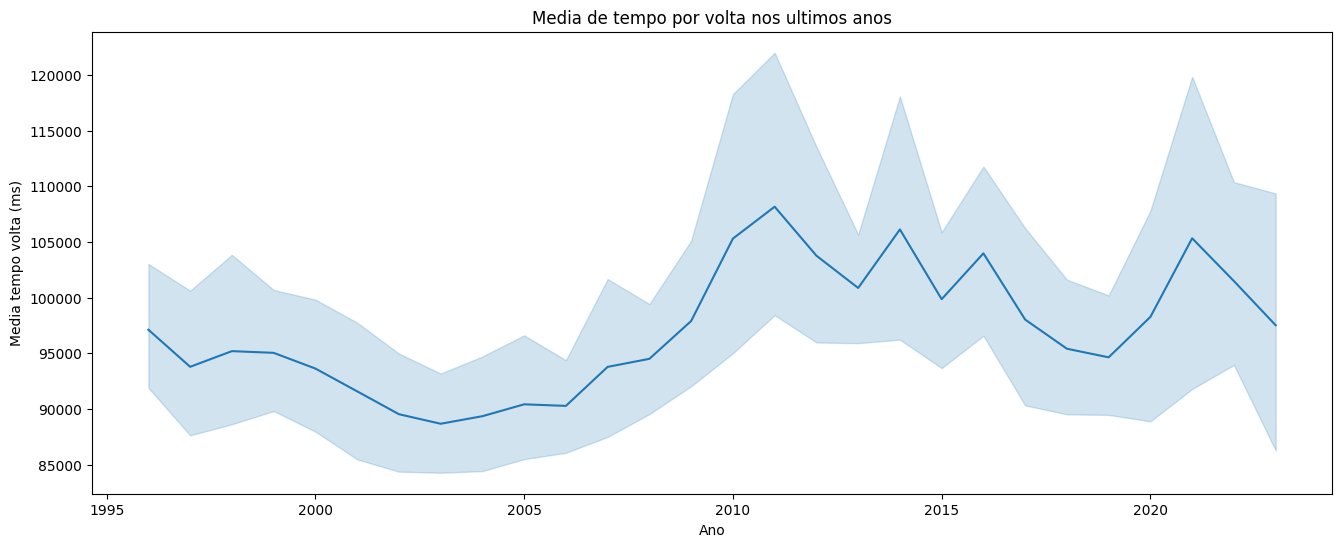

In [46]:
data_corridas_volta = pd.merge(corridas, tempo_por_volta, on='corrida_id')
data_corridas_volta = pd.merge(data_corridas_volta, pilotos, on='piloto_id')
media_tempo_volta = data_corridas_volta.groupby(['ano', 'corrida_id'])['milisegundos'].mean().reset_index()
plt.figure(figsize=(16, 6))
sns.lineplot(x='ano', y='milisegundos', data=media_tempo_volta)
plt.xlabel('Ano')
plt.ylabel('Media tempo volta (ms)')
plt.title('Media de tempo por volta nos ultimos anos')
plt.show()